## Markov Chain Analysis of Intergenerational Educational Mobility and Racial Disparities

  Generation  White <HS  White HS  White >HS  Black <HS  Black HS  Black >HS  \
0        π^0         46        31         23         75        16          9   
1        π^1         25        31         46         35        33         34   
2        π^2         16        26         59         20        29         52   
3        π^3         13        24         65         14        25         62   
4        π^4         11        23         67         12        23         66   
5        π^5         11        22         69         11        22         68   
6        π^6         10        22         69         11        22         69   
7        π^7         10        22         69         10        22         69   
8        π^8         10        22         69         10        22         69   

   Index of Dissimilarity  
0                      29  
1                      13  
2                       7  
3                       3  
4                       2  
5                       1  
6  

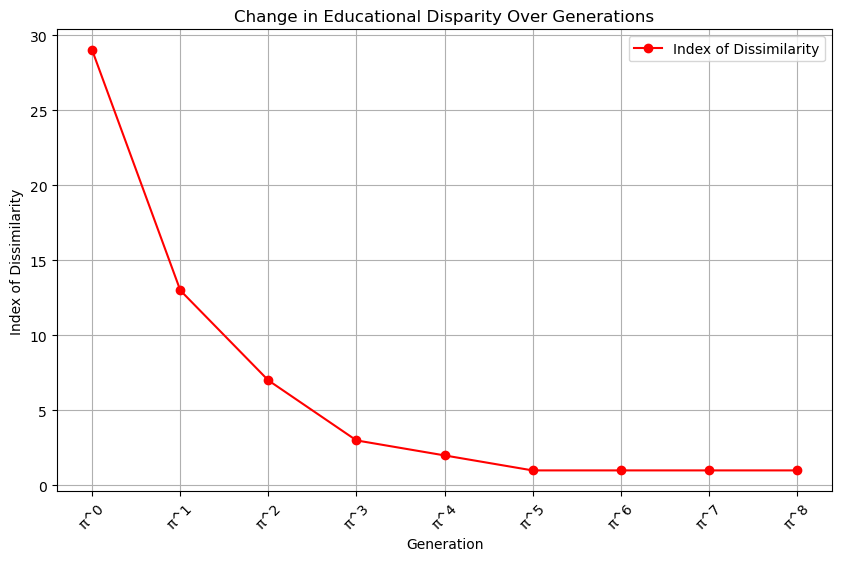

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Transition matrix P (from father to son)
P = np.array([
    [0.43, 0.34, 0.23],  # Less than high school
    [0.10, 0.36, 0.54],  # High school
    [0.05, 0.15, 0.80]   # More than high school
])

# Initial state distribution (1960 data)
pi_0_white = np.array([0.46, 0.31, 0.23])  # White population
pi_0_black = np.array([0.75, 0.16, 0.09])  # Black population

# Number of generations to simulate
generations = 8

# Store results
results = {
    "Generation": [],
    "White <HS": [],
    "White HS": [],
    "White >HS": [],
    "Black <HS": [],
    "Black HS": [],
    "Black >HS": [],
    "Index of Dissimilarity": []
}

# Function to compute the index of dissimilarity
def compute_dissimilarity(pi_w, pi_b):
    return 0.5 * np.sum(np.abs(pi_w - pi_b)) * 100  # Convert to percentage

# Initial values
pi_w = pi_0_white
pi_b = pi_0_black

# Run the Markov process for multiple generations
for gen in range(generations + 1):
    # Store the current generation results
    dissimilarity = compute_dissimilarity(pi_w, pi_b)
    results["Generation"].append(f"π^{gen}")
    results["White <HS"].append(math.ceil(pi_w[0] * 100))
    results["White HS"].append(math.ceil(pi_w[1] * 100))
    results["White >HS"].append(math.ceil(pi_w[2] * 100))
    results["Black <HS"].append(math.ceil(pi_b[0] * 100))
    results["Black HS"].append(math.ceil(pi_b[1] * 100))
    results["Black >HS"].append(math.ceil(pi_b[2] * 100))
    results["Index of Dissimilarity"].append(math.ceil(dissimilarity))

    # Apply transition matrix for next generation
    pi_w = np.dot(pi_w, P)
    pi_b = np.dot(pi_b, P)

# Convert results to DataFrame for display
df_results = pd.DataFrame(results)

# Display the table
print(df_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_results["Generation"], df_results["Index of Dissimilarity"], marker='o', linestyle='-', color='r', label="Index of Dissimilarity")
plt.xlabel("Generation")
plt.ylabel("Index of Dissimilarity")
plt.title("Change in Educational Disparity Over Generations")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Key Takeaways from the Graph:

#### **1. Rapid Initial Decline** – The Index of Dissimilarity drops sharply from 29% to 13% in the first generation, indicating quick early progress.
#### **2. Slower Convergence** – After π¹, the decline slows, showing that residual disparities take multiple generations to disappear.
#### **3. Full Equality Takes Time** – The gap reaches 0% by the 6th-8th generation, confirming that historical inequalities persist for over a century.
#### **4. Non-Linear Change** – The biggest improvements happen early, but eliminating the last disparities takes much longer.
#### **5. Policy Implication** – Without intervention, full equality takes generations; targeted policies could accelerate progress.